# FINAL PROJECT PHASE II

## Research Question:

### Question: 
**Correlation between the user experience and the willingness to purchase products;** 1) Is there a correlation between the user experience (helpful review, helpful recommendation, personalized product recommendations) and the frequency of cart completion? 2) Is there a correlation between the user experience (helpful review, helpful recommendation, personalized product recommendations) and the frequency of adding items to cart? 3) Patterns among different categories in different age groups.



+explain in detail

In [39]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
import duckdb

## Data Overview:

+description

First, we imported our dataset and double checked the numbers of columns and rows with .shape.

In [49]:
#import packages and read csv file
raw_df=pd.read_csv("/Users/ashleychiang/2950PROJECT/Amazon Customer Behavior Survey.csv",thousands=",")

print(raw_df.shape)
raw_df.head()

(602, 23)


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


## DATA CLEANING: 

Based on our research questions and our interests, we filtered out 7 variables/columns that are relevant toward our study, including age, review helpfulness, recommendation helpfulness, personalized recommendation frequency, cart completion frequency, add to cart browsing, and customer reviews importance. 

In [50]:
#we created a new dataframe that is relevant to our research question.

ini_df= duckdb.sql('''

SELECT age, Review_Helpfulness, Recommendation_Helpfulness, 
Personalized_Recommendation_Frequency, Cart_Completion_Frequency, 
Add_to_Cart_Browsing, Customer_Reviews_Importance
FROM raw_df

''').df()

ini_df.head()

,age,Review_Helpfulness,Recommendation_Helpfulness,Personalized_Recommendation_Frequency,Cart_Completion_Frequency,Add_to_Cart_Browsing,Customer_Reviews_Importance
0,23,Yes,Yes,Yes,Sometimes,Yes,1
1,23,Yes,Sometimes,Yes,Often,Yes,1
2,24,No,No,No,Sometimes,Yes,2
3,24,Yes,Sometimes,Sometimes,Sometimes,Maybe,5
4,22,Yes,Yes,Yes,Sometimes,Yes,1


Since some of the columns are strings (i.e. Yes, Sometimes, No) and cannot be numerically measured, we change those strings to corresponding numbers (i.e. 0, 1, 2) with new columns, including columns such as review helpfulness, recommendation helpfulness, personalized recommendation frequency, cart completion frequency, add to cart browsing, and customer reviews importance. 

In [51]:
#We changed the values from string to numbers so that we can actually measure the correlation. 


ini_df['New_Review_Helpfulness']=ini_df['Review_Helpfulness'].\
map({'No': 0, 'Sometimes': 1, 'Yes': 2})

ini_df['New_Recommendation_Helpfulness']=ini_df['Recommendation_Helpfulness'].\
map({'No': 0, 'Sometimes': 1, 'Yes': 2})

ini_df['New_Personalized_Recommendation_Frequency']=ini_df['Personalized_Recommendation_Frequency'].\
map({'No': 0, 'Sometimes': 1, 'Yes': 2})

ini_df['New_Cart_Completion_Frequency']=ini_df['Cart_Completion_Frequency'].\
map({'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often':3, 'Always':4})

ini_df['New_Add_to_Cart_Browsing']=ini_df['Add_to_Cart_Browsing'].\
map({'No': 0, 'Maybe': 1, 'Yes': 2})
ini_df.head()


,age,Review_Helpfulness,Recommendation_Helpfulness,Personalized_Recommendation_Frequency,Cart_Completion_Frequency,Add_to_Cart_Browsing,Customer_Reviews_Importance,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing
0,23,Yes,Yes,Yes,Sometimes,Yes,1,2,2,2,2,2
1,23,Yes,Sometimes,Yes,Often,Yes,1,2,1,2,3,2
2,24,No,No,No,Sometimes,Yes,2,0,0,0,2,2
3,24,Yes,Sometimes,Sometimes,Sometimes,Maybe,5,2,1,1,2,1
4,22,Yes,Yes,Yes,Sometimes,Yes,1,2,2,2,2,2


We created a new dataframe by selecting the new columns, age, and Customer_Reviews_Importance as we will not be using original columns with strings in our project.

In [52]:
#We dropped the old columns that weren't relevant anymore as we got a new column. 


num_df=duckdb.sql('''
SELECT age, New_Review_Helpfulness, New_Recommendation_Helpfulness, 
New_Personalized_Recommendation_Frequency, New_Cart_Completion_Frequency, 
New_Add_to_Cart_Browsing, Customer_Reviews_Importance
FROM ini_df
'''                  
).df()
num_df.head()



,age,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing,Customer_Reviews_Importance
0,23,2,2,2,2,2,1
1,23,2,1,2,3,2,1
2,24,0,0,0,2,2,2
3,24,2,1,1,2,1,5
4,22,2,2,2,2,2,1


In case of outliers and oddities with age, we filtered out the ages that are below 13 since they are not allowed to have an Amazon account. 

In [53]:
#We looked for outliers for age. We know that if age is under 13, they can't make accounts to buy things. 

cleaned_df=duckdb.sql('''
SELECT *
FROM num_df
WHERE age>=13
''').df()

print(cleaned_df.shape)

cleaned_df.head()

(600, 7)


,age,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing,Customer_Reviews_Importance
0,23,2,2,2,2,2,1
1,23,2,1,2,3,2,1
2,24,0,0,0,2,2,2
3,24,2,1,1,2,1,5
4,22,2,2,2,2,2,1


Since customer_reviews_importance reflects the significance of new_review_helpfulness, we combined both variables into one, which we weighted the new_reviews_helpfulness by customer_reviews_importance.

After this, we dropped the customer_reviews_importance as it is already taken into account with our updated column.

In [54]:
#we weight the new_review_helpfulness with customer_reviews_importance, and we dropped the customer_reviews_importance

cleaned_df['New_Review_Helpfulness'] = cleaned_df['New_Review_Helpfulness']*cleaned_df['Customer_Reviews_Importance']

cleaned_df = duckdb.sql('''
SELECT age, New_Review_Helpfulness, New_Recommendation_Helpfulness, 
New_Personalized_Recommendation_Frequency, New_Cart_Completion_Frequency, 
New_Add_to_Cart_Browsing
FROM cleaned_df
''').df()

cleaned_df.head()

,age,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing
0,23,2,2,2,2,2
1,23,2,1,2,3,2
2,24,0,0,0,2,2
3,24,10,1,1,2,1
4,22,2,2,2,2,2


We created a new column called User_Experience where we added up all the factors that are related to customer experience on Amazon, including review helpfulness, recommendation helpfulness, and personalized recommendation frequency.



In [55]:
# combination of 3 x variables

cleaned_df['User_Experience'] = cleaned_df['New_Review_Helpfulness'] + cleaned_df['New_Recommendation_Helpfulness'] + cleaned_df['New_Personalized_Recommendation_Frequency']
cleaned_df.head()

,age,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing,User_Experience
0,23,2,2,2,2,2,6
1,23,2,1,2,3,2,5
2,24,0,0,0,2,2,0
3,24,10,1,1,2,1,12
4,22,2,2,2,2,2,6


We created a new dataframe called x_y_df, which includes x variable (i.e. User_Experience) and y variables(i.e. New_Cart_Completion_Frequency, New_Add_to_Cart_Browsing).

In [56]:
# x_y dataset
x_y_df = duckdb.sql('''
SELECT age, User_Experience, New_Cart_Completion_Frequency, New_Add_to_Cart_Browsing
FROM cleaned_df
''').df()

x_y_df.head()

#We want to categorize into 5 different age groups.

cleaned_df.loc[(cleaned_df["age"] >= 13) & (cleaned_df["age"] <= 18), "age"] = 1
cleaned_df.loc[(cleaned_df["age"] >= 19) & (cleaned_df["age"] <= 25), "age"] = 2
cleaned_df.loc[(cleaned_df["age"] >= 26) & (cleaned_df["age"] <= 40), "age"] = 3
cleaned_df.loc[(cleaned_df["age"] >= 41) & (cleaned_df["age"] <= 64), "age"] = 4
cleaned_df.loc[(cleaned_df["age"] >= 65), "age"] = 5

final_df=duckdb.sql('''
SELECT x_y_df.age, cleaned_df.age AS age_group, cleaned_df.New_Review_Helpfulness, cleaned_df.New_Recommendation_Helpfulness, 
cleaned_df.New_Personalized_Recommendation_Frequency,x_y_df.User_Experience, x_y_df.New_Cart_Completion_Frequency, x_y_df.New_Add_to_Cart_Browsing
FROM x_y_df
INNER JOIN cleaned_df
ON x_y_df.New_Add_to_Cart_Browsing=cleaned_df.New_Add_to_Cart_Browsing
''').df()

final_df.head()

,age,age_group,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,User_Experience,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing
0,23,2,2,2,2,6,2,2
1,23,2,2,2,2,5,3,2
2,24,2,2,2,2,0,2,2
3,24,2,3,1,1,12,2,1
4,22,2,2,2,2,6,2,2


In [59]:
# average of each column

final_average_df = final_df.groupby('age_group')[['New_Review_Helpfulness', 'New_Recommendation_Helpfulness', 'New_Personalized_Recommendation_Frequency', 'New_Cart_Completion_Frequency', 'New_Add_to_Cart_Browsing']].mean()
final_average_df.head()

,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing
age_group,,,,,
1,1.847259,0.742597,0.464380,2.225154,0.995309
2,2.946097,1.046830,0.799023,2.240825,1.333128
3,2.615557,0.943827,0.816671,2.224648,1.172390
4,2.579967,1.018938,0.910652,2.165718,1.084625
5,2.356771,1.643229,1.000000,2.080729,0.643229


## Explorative Analysis:

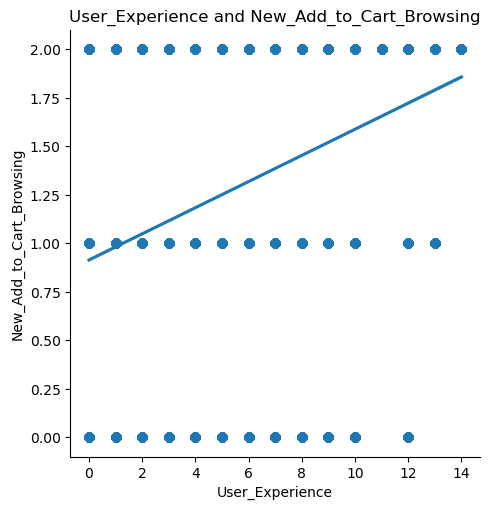

In [60]:
#General One 
plot1 = sns.lmplot(data = final_df, x='User_Experience', y='New_Add_to_Cart_Browsing')
plt.title('User_Experience and New_Add_to_Cart_Browsing')
plt.show()

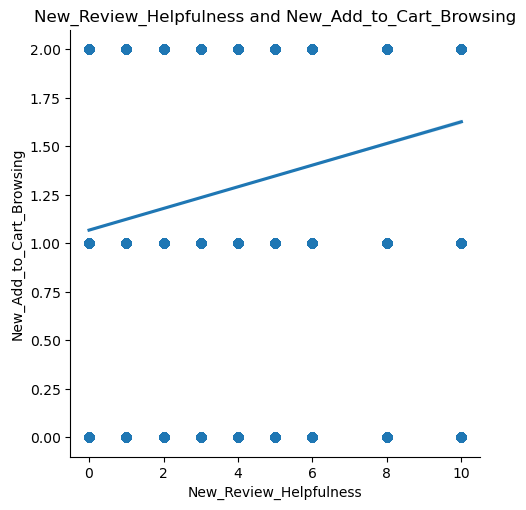

In [61]:
#X1 and Y1
plot1_1=sns.lmplot(data = final_df, x='New_Review_Helpfulness', y='New_Add_to_Cart_Browsing')
plt.title('New_Review_Helpfulness and New_Add_to_Cart_Browsing')
plt.show()

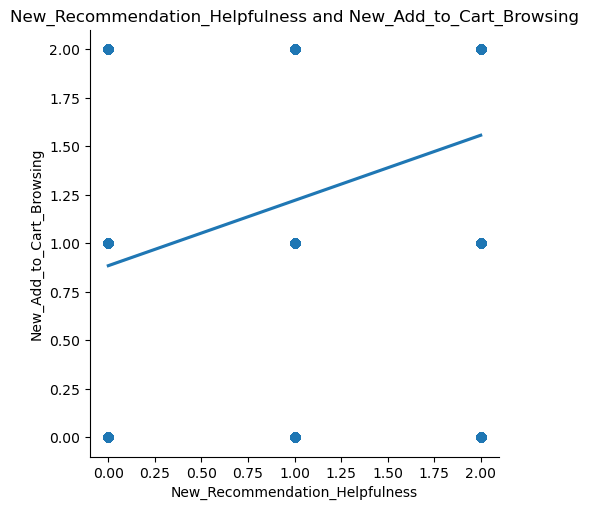

In [62]:
#X2 and Y1
plot1_2=sns.lmplot(data = final_df, x='New_Recommendation_Helpfulness', y='New_Add_to_Cart_Browsing')
plt.title('New_Recommendation_Helpfulness and New_Add_to_Cart_Browsing')
plt.show()

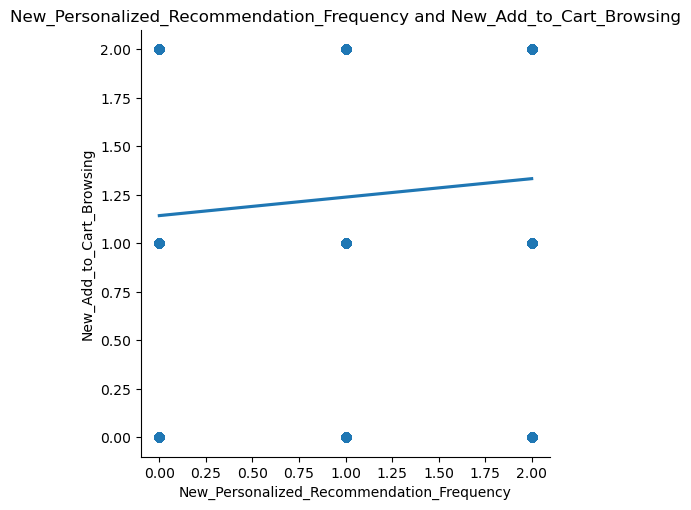

0.095
1.143


In [78]:
#X3 and Y1
plot1_3=sns.lmplot(data = final_df, x='New_Personalized_Recommendation_Frequency', y='New_Add_to_Cart_Browsing')
plt.title('New_Personalized_Recommendation_Frequency and New_Add_to_Cart_Browsing')
plt.show()

X=final_df['New_Personalized_Recommendation_Frequency'].values.reshape(-1,1)
y=final_df['New_Add_to_Cart_Browsing'].values
model1_3 = LinearRegression().fit(X, y)
print(model1_3.coef_[0].round(3))
print(model1_3.intercept_.round(3))

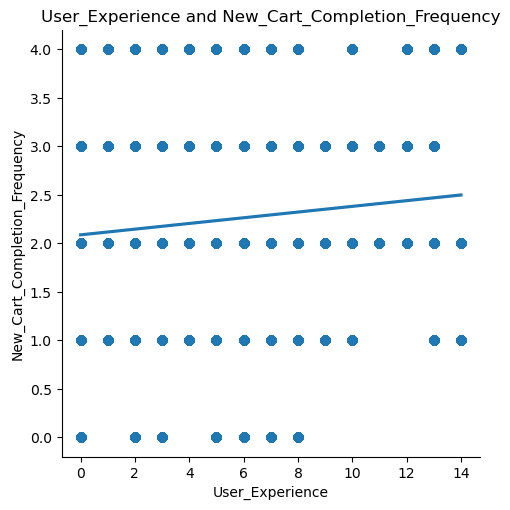

In [64]:
plot2 = sns.lmplot(data = final_df, x='User_Experience', y='New_Cart_Completion_Frequency')
plt.title('User_Experience and New_Cart_Completion_Frequency')
plt.show()

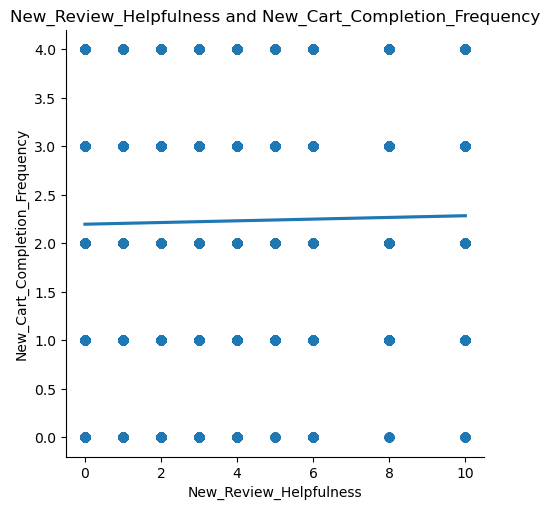

In [65]:
plot2_1 = sns.lmplot(data = final_df, x='New_Review_Helpfulness', y='New_Cart_Completion_Frequency')
plt.title('New_Review_Helpfulness and New_Cart_Completion_Frequency')
plt.show()

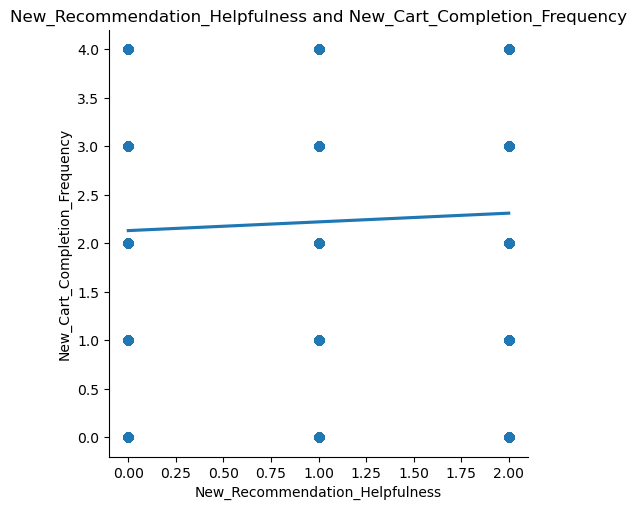

In [66]:
plot2_2 = sns.lmplot(data = final_df, x='New_Recommendation_Helpfulness', y='New_Cart_Completion_Frequency')
plt.title('New_Recommendation_Helpfulness and New_Cart_Completion_Frequency')
plt.show()

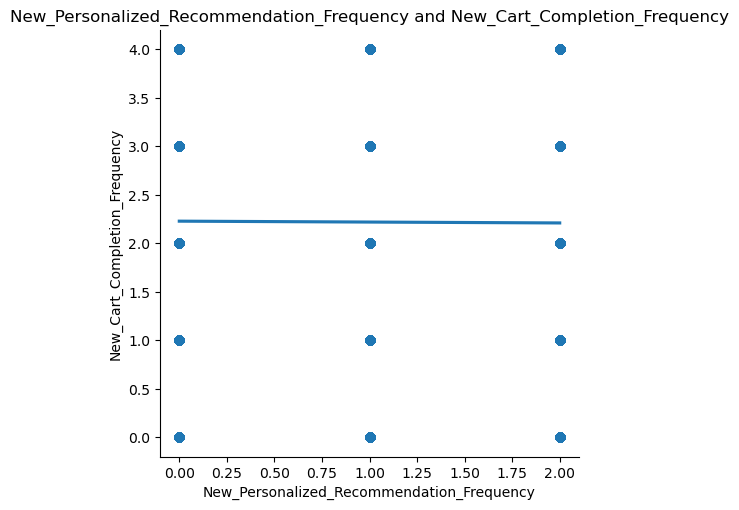

In [67]:
plot2_3 = sns.lmplot(data = final_df, x='New_Personalized_Recommendation_Frequency', y='New_Cart_Completion_Frequency')
plt.title('New_Personalized_Recommendation_Frequency and New_Cart_Completion_Frequency')
plt.show()

/Users/ashleychiang/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ashleychiang/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


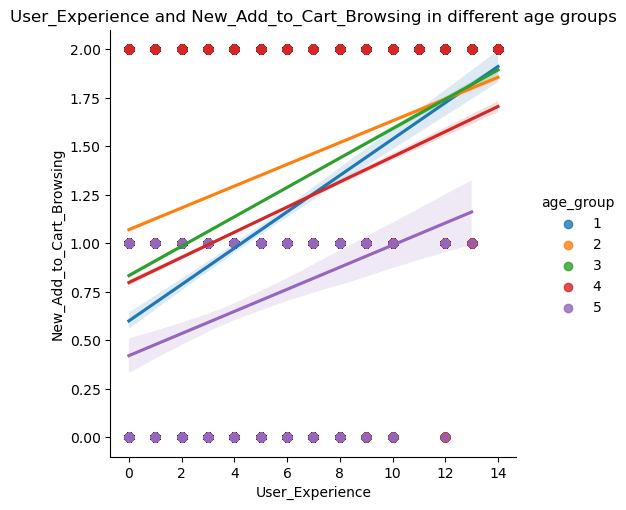

In [17]:
plot3 = sns.lmplot(data = age_group_df, x='User_Experience', y='New_Add_to_Cart_Browsing', hue='age_group')
plt.title('User_Experience and New_Add_to_Cart_Browsing in different age groups')
plt.xlabel()
plt.show()

/Users/ashleychiang/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ashleychiang/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ashleychiang/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ashleychiang/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

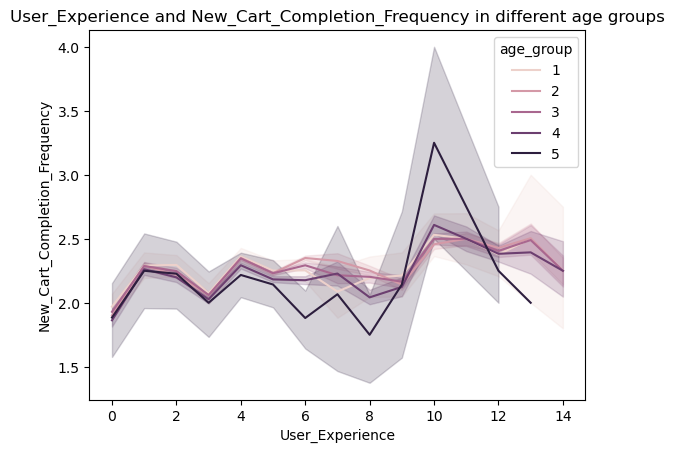

In [19]:
plot4 = sns.lineplot(data = age_group_df, x='User_Experience', y='New_Cart_Completion_Frequency', hue='age_group')
plt.title('User_Experience and New_Cart_Completion_Frequency in different age groups')
plt.show()

## Data Description:

### Motivation:


### Data Source:

## Data Limitation:

## Explorative Analysis:

## Questions for Reviewer: